In [1]:
import openmm as mm
import numpy as np
import openmm.app as app
import simtk.unit as unit
from openmmforcefields.generators import GAFFTemplateGenerator as gen
from openff.toolkit import Topology
import pytraj as pt
import os
import matplotlib.pyplot as plt

from openmm.app import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet



In [2]:
base = '/scratch/htc/fsafarov/structures/8ef5_new/8ef5'

#We use psf and crd system because pdb files does not support the 6-digit base system for ATOM ID's, which is in our case utilized for POPC. 
#Input below is from psf and crd from CHARMM-GUI.

psf = CharmmPsfFile(os.path.join(base, 'step5_assembly.psf'))
crd = CharmmCrdFile(os.path.join(base, 'step5_assembly.crd'))

#Input all the parameters from toppar folder of CHARMM-GUI output for all the components of psf and crd.

params = CharmmParameterSet(
    os.path.join(base, 'toppar/top_all36_prot.rtf'),
    os.path.join(base, 'toppar/par_all36m_prot.prm'),
    os.path.join(base, 'toppar/top_all36_na.rtf'),
    os.path.join(base, 'toppar/par_all36_na.prm'),
    os.path.join(base, 'toppar/top_all36_carb.rtf'),
    os.path.join(base, 'toppar/par_all36_carb.prm'),
    os.path.join(base, 'toppar/top_all36_lipid.rtf'),
    os.path.join(base, 'toppar/par_all36_lipid.prm'),
    os.path.join(base, 'toppar/top_all36_cgenff.rtf'),
    os.path.join(base, 'toppar/par_all36_cgenff.prm'),
    os.path.join(base, 'toppar/toppar_all36_moreions.str'),
    os.path.join(base, 'toppar/top_interface.rtf'),
    os.path.join(base, 'toppar/par_interface.prm'),
    os.path.join(base, 'toppar/toppar_all36_nano_lig.str'),
    os.path.join(base, 'toppar/toppar_all36_nano_lig_patch.str'),
    os.path.join(base, 'toppar/toppar_all36_synthetic_polymer.str'),
    os.path.join(base, 'toppar/toppar_all36_synthetic_polymer_patch.str'),
    os.path.join(base, 'toppar/toppar_all36_polymer_solvent.str'),
    os.path.join(base, 'toppar/toppar_water_ions.str'),
    os.path.join(base, 'toppar/toppar_dum_noble_gases.str'),
    os.path.join(base, 'toppar/toppar_ions_won.str'),
    os.path.join(base, 'toppar/cam.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_arg0.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_c36m_d_aminoacids.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_fluoro_alkanes.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_heme.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_na_combined.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_retinol.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_model.str'),
    os.path.join(base, 'toppar/toppar_all36_prot_modify_res.str'),
    os.path.join(base, 'toppar/toppar_all36_na_nad_ppi.str'),
    os.path.join(base, 'toppar/toppar_all36_na_rna_modified.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_sphingo.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_archaeal.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_bacterial.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_cardiolipin.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_cholesterol.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_dag.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_inositol.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_lnp.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_lps.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_mycobacterial.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_miscellaneous.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_model.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_prot.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_tag.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_yeast.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_hmmm.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_detergent.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_ether.str'),
    os.path.join(base, 'toppar/toppar_all36_lipid_oxidized.str'),
    os.path.join(base, 'toppar/toppar_all36_carb_glycolipid.str'),
    os.path.join(base, 'toppar/toppar_all36_carb_glycopeptide.str'),
    os.path.join(base, 'toppar/toppar_all36_carb_imlab.str'),
    os.path.join(base, 'toppar/toppar_all36_label_spin.str'),
    os.path.join(base, 'toppar/toppar_all36_label_fluorophore.str'),
    os.path.join(base, '7v7/7v7.rtf'),
    os.path.join(base, '7v7/7v7.prm')
)

/scratch/htc/fsafarov/openmm_ff/lib/python3.12/site-packages/openmm/app/charmmparameterset.py:391: UserWarning: Replacing dihedral <DihedralType: k=0.27; phase=180.0; per=2> with <DihedralType: k=0.03; phase=180.0; per=2>
  warnings.warn('Replacing dihedral %r with %r' %
/scratch/htc/fsafarov/openmm_ff/lib/python3.12/site-packages/openmm/app/charmmparameterset.py:391: UserWarning: Replacing dihedral <DihedralType: k=0.0; phase=0.0; per=3> with <DihedralType: k=0.12; phase=0.0; per=3>
  warnings.warn('Replacing dihedral %r with %r' %


In [3]:
psf.setBox(100.116666*unit.angstroms, 100.116666*unit.angstroms, 127.138691*unit.angstrom)
#Set up a box

In [4]:
n1_atom = psf.topology.getNumAtoms()
n1_atom

118273

In [8]:
system = psf.createSystem(params, nonbondedMethod=app.PME, nonbondedCutoff=1.0 * unit.nanometer, constraints = app.HBonds)
#constraints = app.HBonds::We constraint the Hydrogen bonds so that they won\t stretch during the simulation

In [10]:
# Centering the solute within the periodic box before running the simulation
# This step is not strictly required for the simulation to run correctly,
# but without it, the periodic box may appear misaligned with the structure,
# causing the protein (or membrane) to drift outside the visible box in trajectory files.
# Centering improves visualization and helps ensure proper PBC wrapping in trajectory output.
positions_check = crd.positions
center = np.mean(positions_check.value_in_unit(unit.nanometer), axis=0)
box = psf.topology.getUnitCellDimensions().value_in_unit(unit.nanometer)
box_center = np.array(box) / 2.0
translation = box_center - center
centered_positions = positions_check + translation * unit.nanometer
centered_positions = centered_positions.value_in_unit(unit.nanometer)

In [12]:
integrator_eq = mm.LangevinIntegrator(100*unit.kelvin, 1/unit.picoseconds, 2.0*unit.femtoseconds)

In [13]:
system.addForce(mm.MonteCarloBarostat(1000*unit.bar, 100*unit.kelvin))

10

In [9]:
restraint = mm.CustomExternalForce('0.5*k_1*(z - z0)^2')
# system.addForce(restraint)non-standard (HET) residues (excluding water).
# - Inter-residue connectivity of HET  groups to standard groups (including water) or to other HET groups. 
# - Disulfide bridges specified in the  SSBOND records have corresponding records.

restraint.addGlobalParameter('k_1', 5.0*unit.kilocalories_per_mole/unit.angstrom**2)
restraint.addPerParticleParameter('z0')
system.addForce(restraint)

9

In [11]:
for residue in psf.topology.residues():
    if residue.name == 'POPC':
        for atom in residue.atoms():
            pos = centered_positions[atom.index]
            restraint.addParticle(atom.index, [pos[2]])

In [ ]:
protein_restraint = mm.CustomExternalForce('k_2*periodicdistance(x, y, z, x0, y0, z0)^2')
# system.addForce(restraint)non-standard (HET) residues (excluding water).
# - Inter-residue connectivity of HET  groups to standard groups (including water) or to other HET groups. 
# - Disulfide bridges specified in the  SSBOND records have corresponding records.

protein_restraint.addGlobalParameter('k_2', 50*unit.kilocalories_per_mole/unit.angstrom**2)
protein_restraint.addPerParticleParameter('x0')
protein_restraint.addPerParticleParameter('y0')
protein_restraint.addPerParticleParameter('z0')
system.addForce(protein_restraint)

In [ ]:
#standard aminoacid residues in proteins (to apply the specific restraint to the protein)
std_amino_acids = ['GLY', 'TYR', 'PHE', 'ARG', 'HIS', 'ALA', 'PRO', 'GLU', 'SER', 'LYS',
    'THR', 'MET', 'CYS', 'LEU', 'GLN', 'ASN', 'VAL', 'ILE', 'ASP', 'TRP']

for residue in psf.topology.residues():
    if residue.name in std_amino_acids:
        for atom in residue.atoms():
            if atom.name != 'H':
                pos = centered_positions[atom.index]
                protein_restraint.addParticle(atom.index, [pos[0], pos[1], pos[2]])


In [14]:
platform = mm.Platform.getPlatformByName('CUDA')
#to run the simulation on several GPU's parallelly
properties  = {'CudaDeviceIndex': '0,1,2', 'CudaPrecision': 'mixed'}

In [15]:
#loads checkpoint if exists
simulation_eq = app.Simulation(psf.topology, system, integrator_eq, platform, properties)
if os.path.exists('/scratch/htc/fsafarov/traj/checkpoint_pr_nvt_1_2.chk'):
    simulation_eq.loadCheckpoint('/scratch/htc/fsafarov/traj/checkpoint_pr_nvt_1_2.chk')
else:
    simulation_eq.context.setPositions(centered_positions)
    box_vectors = psf.topology.getPeriodicBoxVectors()
    simulation_eq.context.setPeriodicBoxVectors(*box_vectors)

In [20]:
simulation_eq.context.setVelocitiesToTemperature(100*unit.kelvin)

In [ ]:
state = simulation_eq.context.getState(getEnergy=True)
print("Potential energy before minimization:", state.getPotentialEnergy())

simulation_eq.minimizeEnergy()
#default number of iterations is unlimited. maxiterations = 0 mean unlimited.

# After minimization
state = simulation_eq.context.getState(getEnergy=True)
print("Potential energy after minimization:", state.getPotentialEnergy())

In [22]:
# # steps_per_microsecond = int(1e6 / (2.4 * 1e-3))# Number of steps per µs with 2.4 fs timestep
# # print(steps_per_microsecond)
# simulation_eq.reporters.append(app.StateDataReporter('/scratch/htc/fsafarov/traj/output_membrane_barostat_2.log', 1000, step=True, potentialEnergy=True, temperature=True))

simulation_eq.reporters.append(app.DCDReporter('/scratch/htc/fsafarov/traj/trajectory_pr_npt_1.dcd', 100, enforcePeriodicBox=True))
simulation_eq.reporters.append(app.CheckpointReporter('/scratch/htc/fsafarov/traj/checkpoint_pr_npt_1.chk', 1000))
simulation_eq.step(10000)


(array([1.72202789e-02, 8.28108951e-02, 2.00830131e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.09683305e-04]),
 array([0.01821176, 0.09529747, 0.17238318, ..., 7.57261104, 7.64969675,
        7.72678246]),
 <BarContainer object of 100 artists>)

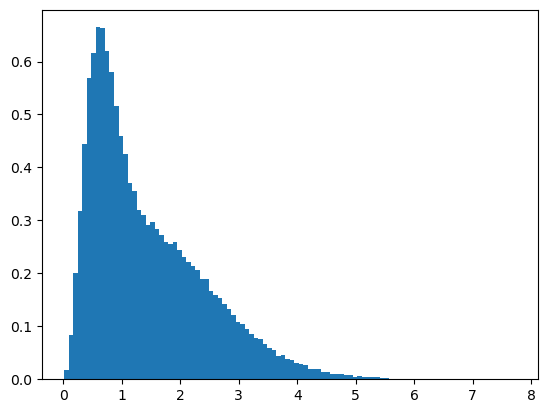

In [23]:
state_1 = simulation_eq.context.getState(getVelocities=True)
velocities = state_1.getVelocities().value_in_unit(unit.nanometer/unit.picosecond)
speed = np.linalg.norm(velocities, axis = 1)
plt.hist(speed, 100, density = True)
plt.grid()



In [24]:
# simulation_eq.currentStep

In [25]:
# # #progress the simulation in chunks (too much frames at ones for longer simulation)
# completed_steps = simulation_eq.currentStep
# while completed_steps < 50000000:
#     simulation_eq.step(5000000)
#     completed_steps += 5000000
#     simulation_eq.saveCheckpoint('/scratch/htc/fsafarov/traj/checkpoint4.chk')
#     print(f"{completed_steps} steps are done and written into the checkpoint file.")
    

In [26]:

# pos = simulation_eq.context.getState(getPositions=True).getPositions()

# with open("final_output.pdb", "w") as file_:
#     app.PDBFile.writeFile(simulation_eq.topology, pos, file_)
